**Using pure Numpy to build 3 layer neural network with Relu non linearity**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Prepare Data

In [2]:
# 3 Dimension non-linear input data

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1,-1],[3,0,-1],]).T
bias_true = np.array([0.5,0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


Visualizing the data generated using TSNE

In [3]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(x)
view.shape

(200, 2)

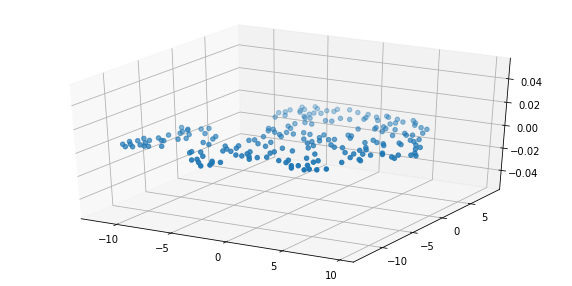

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(10,5))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [5]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    #output = (x ** 2) @ weights_true + x @ weights_true + bias_true
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

Adding non-linearity: Relu

In [6]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


Train our new non linear model

In [7]:
class Model:
  def __init__(self, input_dim, num_hidden, output_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, output_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10,output_dim=2)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
#plot_3d(x, y_true, y_pred)

8.89685493124227


array([[ 1.64129821e-02, -6.20276959e-03, -4.82670573e-03],
       [ 3.19506539e-02,  8.15121756e-04, -3.04851263e-03],
       [ 2.91915860e-01, -1.09474118e-01, -3.37480033e-02],
       [ 2.22962010e-01, -1.05367712e-01, -3.73584805e-02],
       [ 7.67392263e-02, -4.53443660e-02, -4.12625162e-03],
       [ 1.39138862e-04, -2.58733362e-03,  6.13722535e-03],
       [-7.11676027e-04,  5.63804236e-04,  2.72128346e-04],
       [ 4.67074525e-03, -5.79179979e-03, -1.53696710e-03],
       [-2.49582623e-02,  2.90036174e-02, -2.81495615e-03],
       [ 4.87494850e-05, -9.06512960e-04,  2.15027327e-03],
       [ 2.13066191e-03,  2.71414345e-03, -2.93704774e-07],
       [ 5.07012266e-03, -1.37658420e-02, -3.09787204e-03],
       [ 1.74321976e-01, -8.76821511e-02, -1.15876717e-02],
       [ 1.90978210e-03,  2.73972964e-03, -6.74684861e-05],
       [ 3.79500123e-03,  8.31934632e-04,  3.13349284e-03],
       [ 1.05815781e-02, -5.49172277e-03, -6.78920594e-04],
       [ 1.45086829e-01, -5.55811075e-02

In [8]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


Initializing non-linear and loss for three dimensional data<br/>
3-d input and 2-d output with 2 hidden layers, 10 neurons for hidden layers

In [9]:

loss = MSE()
nonlinear = Model(3,20,2)
y_pred = nonlinear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred,y_true))

(200, 3) (3, 2) (200, 2) (200, 2)
7.545048470749457


In [10]:
fit(x, y_true, model=nonlinear, loss=loss, lr=0.1, num_epochs=400)
y_pred = nonlinear(x)

Epoch 0, loss 7.545048470749457
Epoch 1, loss 1.8962745336079536
Epoch 2, loss 1.2281915257119431
Epoch 3, loss 0.8730469761982801
Epoch 4, loss 0.6391088500615081
Epoch 5, loss 0.4837809343505699
Epoch 6, loss 0.3802236571325162
Epoch 7, loss 0.3104387049342312
Epoch 8, loss 0.2619589751346027
Epoch 9, loss 0.22704434979503607
Epoch 10, loss 0.20111463858969267
Epoch 11, loss 0.18117644325376106
Epoch 12, loss 0.16536058265585502
Epoch 13, loss 0.15293851294108893
Epoch 14, loss 0.14270758066647626
Epoch 15, loss 0.13396628973171276
Epoch 16, loss 0.1262845158156914
Epoch 17, loss 0.11944963301986085
Epoch 18, loss 0.11333452473665616
Epoch 19, loss 0.10783290582631895
Epoch 20, loss 0.10286582931967343
Epoch 21, loss 0.09833566126641038
Epoch 22, loss 0.09418443669184377
Epoch 23, loss 0.0904107961654331
Epoch 24, loss 0.08697691007859415
Epoch 25, loss 0.08379036480160755
Epoch 26, loss 0.08083535468642458
Epoch 27, loss 0.07808997193527081
Epoch 28, loss 0.07557173975541256
Epoch 2

In [11]:
print(f'x: {x.shape}, y: {y_true.shape}, y1: {y_pred.shape}')
print(y_true)
print(y_pred)

x: (200, 3), y: (200, 2), y1: (200, 2)
[[ 5.27142151e-01  2.22522434e-01]
 [ 2.82256440e+00  1.09563758e+00]
 [ 5.48013019e+00  5.10850780e+00]
 [ 2.38191486e+00  3.26166937e+00]
 [ 6.65981350e-01  7.32864780e-01]
 [ 5.29359625e-01 -1.38706490e+00]
 [ 1.09350486e+00 -5.19755590e-02]
 [ 2.29303749e-01 -1.81405292e-01]
 [-1.79832418e+00 -2.21735560e+00]
 [ 1.56020969e-01 -3.45451139e-01]
 [ 2.12879686e+00 -4.16453278e-01]
 [ 6.58235989e-01  3.21114027e-01]
 [ 1.42697013e+00  2.31189645e+00]
 [ 1.85788804e+00 -4.73974126e-01]
 [ 9.92466406e-01 -1.19077613e+00]
 [-8.58983071e-01 -6.45098434e-01]
 [ 1.66254560e+00  2.34252657e+00]
 [ 4.45068053e+00  6.28737417e+00]
 [ 3.74420828e-01  1.16338833e-01]
 [ 7.21007178e-01  3.52920148e-01]
 [-2.27227257e-01 -4.13053512e-01]
 [ 1.94186603e+00  5.31698490e-01]
 [-6.99428025e-01 -1.04415043e+00]
 [-9.54674206e-01 -1.32039512e+00]
 [ 8.30427920e-01 -8.63812776e-01]
 [ 2.96503058e+00  2.05448791e+00]
 [-1.01692595e+00 -1.18172155e+00]
 [-4.38303674e-0

Text(0, 0.5, 't-SNE-2')

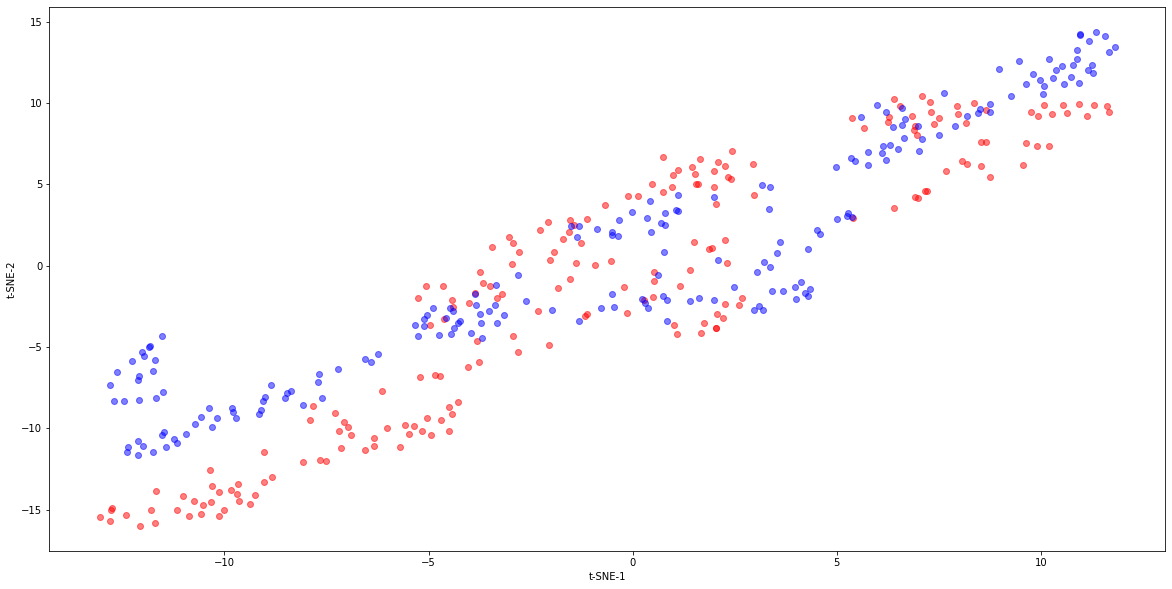

In [12]:
 from sklearn.manifold import TSNE
 view_true = TSNE(n_components=2, random_state=0).fit_transform(y_true)
 view_pred = TSNE(n_components=2, random_state=0).fit_transform(y_pred)
 #y_pred = y_pred.astype('int')
 plt.figure(figsize=(20,10))
 plt.scatter(view_true[:,0], view_true[:,1], c='r', alpha=0.5)
 plt.scatter(view_pred[:,0], view_pred[:,1], c='b', alpha=0.5)
 plt.xlabel('t-SNE-1')
 plt.ylabel('t-SNE-2')